# Cálculo de derivadas numéricas
## Proyecto PAPIME PE101019
- Autor: Luis M. de la Cruz Salas
- Rev: lun jul  6 19:29:17 CDT 2020

Alumno: Rosas Avila José Daniel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [2]:
params = {'figure.figsize' : (10,5),
#          'text.usetex'    : True,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.labelsize' : 20,
          'axes.titlesize' : 20,
          'legend.fontsize': 15,
          'lines.linewidth'     : 3}

plt.rcParams.update(params)

### Aproximación de la primera derivada usando diferencias finitas hacia adelante (Forward):

$
\displaystyle
\dfrac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$

Definimos una función de Python para calcular está formula como sigue:

In [3]:
def forwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia adelante.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia adelante.
    """
    return (u(x+h)-u(x))/h

In [4]:
# Definimos un arreglo con diferentes tamaños de h:
N = 6
h = np.zeros(N)

h[0] = 1.0
for i in range(1,N):
    h[i] = h[i-1] * 0.5

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
x = np.ones(N)

print(h)
print(x)

[1.      0.5     0.25    0.125   0.0625  0.03125]
[1. 1. 1. 1. 1. 1.]


In [5]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ef = np.fabs( np.cos(x) - forwardFD(np.sin,x,h) )

# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef]).transpose(), 
                     columns=['$h$','$D_+$'])
Error

,$h$,$D_+$
0,1.00000,0.472476
1,0.50000,0.228254
2,0.25000,0.110248
3,0.12500,0.053929
4,0.06250,0.026639
5,0.03125,0.013235


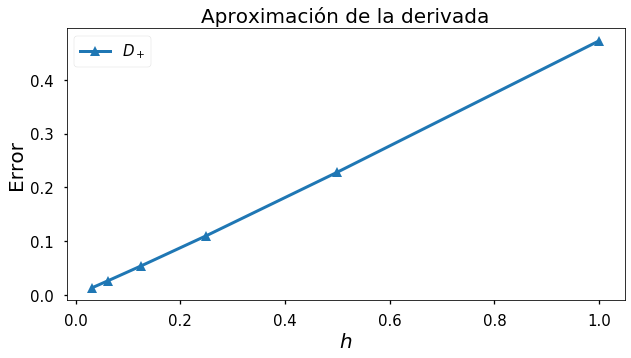

In [6]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

### Aproximación de la primera derivada usando diferencias finitas hacia atrás (Backward):

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$

Definimos una función de Python para calcular está formula como sigue:

In [7]:
def backwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia atrás.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia atrás.
    """
    return (u(x)-u(x-h))/h

In [8]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
eb = np.fabs( np.cos(x) - backwardFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef, eb]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$'])
Error

,$h$,$D_+$,$D_-$
0,1.00000,0.472476,0.301169
1,0.50000,0.228254,0.183789
2,0.25000,0.110248,0.099027
3,0.12500,0.053929,0.051118
4,0.06250,0.026639,0.025936
5,0.03125,0.013235,0.013059


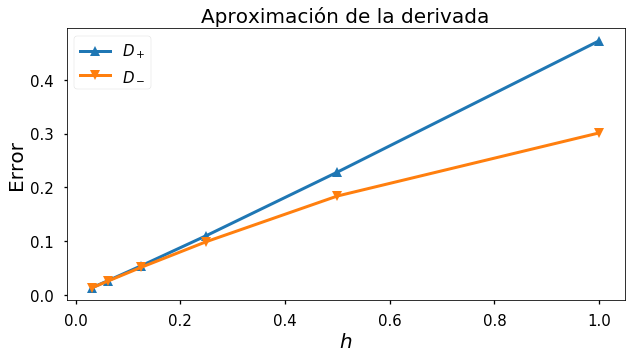

In [9]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

### Aproximación de la primera derivada usando diferencias finitas hacía centradas (Centered):

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$

Definimos una función de Python para calcular está formula como sigue:

In [10]:
def centeredFD(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (u(x+h)-u(x-h))/(2*h)

In [11]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$'])
Error

,$h$,$D_+$,$D_-$,$D_0$
0,1.00000,0.472476,0.301169,0.085654
1,0.50000,0.228254,0.183789,0.022233
2,0.25000,0.110248,0.099027,0.005611
3,0.12500,0.053929,0.051118,0.001406
4,0.06250,0.026639,0.025936,0.000352
5,0.03125,0.013235,0.013059,0.000088


Observe que en este caso los errores son varios órdenes de magnitud más pequeños que para $D_+$ y $D_-$. Para hacer una gráfica más representativa usaremos escala log-log:

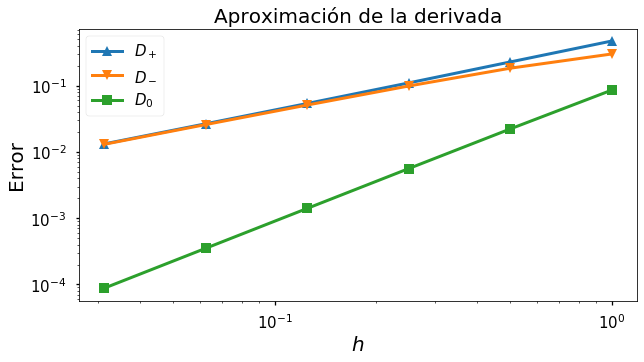

In [12]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Como se puede apreciar, la gráfica anterior muestra que la aproximación con diferencias finitas centradas es mejor, pues es de orden cuadrático.

## Ejercicio 0.
Para mejorar aún más la aproximación de la derivada se pueden usar más puntos en la fórmula de aproximación. Por ejemplo: 

$
D_3 u = \dfrac{1}{6 h} 
\left[ 2u_{i+1} + 3u_{i} - 6u_{i-1} + u_{i-2} \right]
$

- Agregar una función de Python para calcular la derivada con la fórmula anterior.
- Calcular el error, completar la tabla de errores y hacer el gráfico con todas las aproximaciones. 

Al final de este ejercicio se debe obtener un gráfico similar al de la siguiente figura:

<img src="./Figuras/dernum.png">

**Hint**: Recuerde que $u_i = u(x)$, $u_{i+1} = u(x+h)$, $u_{i-1} = u(x-h)$ y $u_{i-2} = u(x-2h)$.

In [13]:
# Implementación de D3
def centeredFD3(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h)
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h)

In [14]:
ec3 = np.fabs( np.cos(x) - centeredFD3(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error= pd.DataFrame(np.array([h,ef,eb,ec,ec3]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$
0,1.00000,0.472476,0.301169,0.085654,0.043287
1,0.50000,0.228254,0.183789,0.022233,0.007314
2,0.25000,0.110248,0.099027,0.005611,0.001014
3,0.12500,0.053929,0.051118,0.001406,0.000132
4,0.06250,0.026639,0.025936,0.000352,0.000017
5,0.03125,0.013235,0.013059,0.000088,0.000002


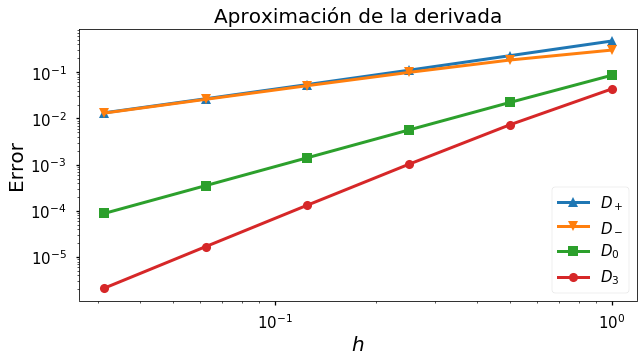

In [15]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h,ec3, 'o-',label='$D_3$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

# Herramienta interativa
La siguiente herramienta tiene como propósito mostras diferentes funciones y sus derivadas exactas así como el cálculo numérico de las derivadas usando varias aproximaciones. Puedes elegir la función y el tipo de aproximación. Después, puedes mover el punto donde se realiza la aproximación y el tamaño de la $h$.

In [16]:
# LINUX y MACOS
#%run "./utils/interactiveDerivadasNumericas.ipynb"

# Si usas WINDOWS debes comentar la línea de arriba y 
# descomentar la línea que sigue. Deberás también sustituir
# TU_DIRECTORIO por el directorio donde esté el repositorio GeoMaC

#%run "D:\\TU_DIRECTORIO\\GeoMaC\\DerivadasNumericas\\utils\\interactiveDerivadasNumericas.ipynb"
#%run "./utils/interactiveDerivadasNumericas.ipynb"

## Ejercicio 1.
Implementar la siguiente aproximación y graficarla junto con todos los resultados anteriores:

$$
f^\prime = \frac{3 f_i - 4 f_{i-1} + f_{i-2}}{2h}
$$

In [17]:
# Implementación de D3
def centeredFD4(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h)
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (3*u(x)-4*u(x-h)+u(x-2*h))/(2*h)

In [18]:
ec4 = np.fabs( np.cos(x) - centeredFD4(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error= pd.DataFrame(np.array([h,ef,eb,ec,ec3,ec4]).transpose(), 
                      columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$','$D_{-2}$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_{-2}$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182


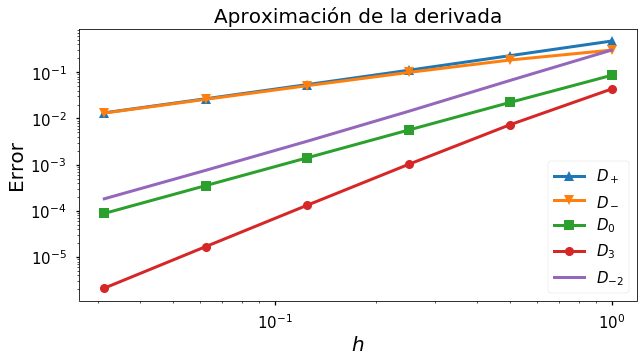

In [19]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h,ec3, 'o-',label='$D_3$')
plt.plot(h,ec4, '-', label='$D_{-2}}$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

## Ejercicio 2.
Obtener los coeficientes $A$, $B$ y $C$ para una aproximación del siguiente tipo: 

$$
f^\prime = A f_i + B f_{i+1} + C f_{i+2}
$$

y luego implementar la fórmula y graficarla junto con los resultados anteriores.

¿Cuál de todas las aproximaciones usaría? ¿Por qué?

In [20]:
def centeredFD2(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (-3*u(x)+4*u(x+h)-u(x+2*h))/(2*h)

In [21]:
ecFD2 = np.fabs( np.cos(x) - centeredFD2(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error= pd.DataFrame(np.array([h,ef,eb,ec,ec3,ec4,ecFD2]).transpose(), 
                      columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$','$D_{-2}$','$D_{+2}$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_{-2}$,$D_{+2}$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169,0.054474
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408,0.015967
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265,0.007759
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209,0.002389
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754,0.000651
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182,0.000169


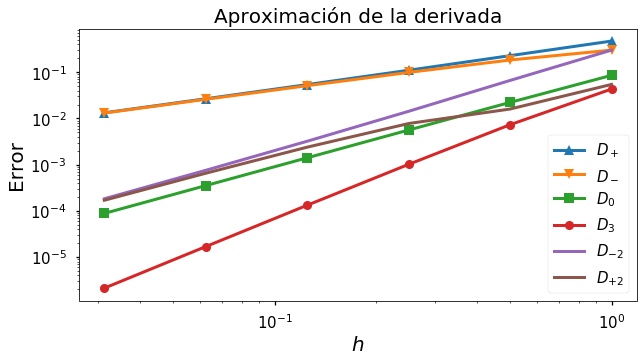

In [22]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h,ec3, 'o-',label='$D_3$')
plt.plot(h,ec4, '-', label='$D_{-2}}$')
plt.plot(h,ecFD2, '-', label='$D_{+2}$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Se observa que la mejor aproximación (menor error) de la derivada se da cuando se tiene un mayor número de puntos, en este caso $D_3$. Sin embargo, si no se toma en consideración esta ultima, se observa que la aproximación mediante las diferencias centradas $D_0$ sería la mejor aproximación de la derivada, aunque para este caso en particular para valores de $h$ cercanos a la unidad, $D_{+2}$ podría ser una mejor aproximación
. 

# Ejercicios: Derivadas Numéricas Parte 2

## Geofísica Matemática y Computacional
- Prof. Luis Miguel de la Cruz Salas
- Rev: mié oct 14 19:08:02 CDT 2020

 Nombre del alumno: Rosas Avila José Daniel

In [23]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline

# Masa y densidad

Don Nacho, un experimentado maestro albañil, necesita cortar una varilla de metal en varias secciones para construir una escalera. Realiza las marcas de la varilla y se ven como en la siguiente figura:

<img src="./Figuras/secciones.png">


Como se observa, el tamaño de cada sección de la varilla es de 0.5 m. Por razones de la estructura, se necesita conocer el peso de cada sección de la varilla para evitar que la escalera se derrumbe. Don Nacho hizo los cortes y pesó cada sección, obteniendo los siguientes resultados:

| Sección | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|---|---|---|---|---|---|---|---|---|
| Masa [Kg] | 0.595 | 0.806 | 0.369 | 1.078 | 1.704 | 1.475 | 2.263 |  3.282 |

## Ejercicio 1.
Construya dos arreglos de numpy: uno para almacenar las marcas de las secciones de nombre `secciones` y otro que se llame `masas_sec` para almacenar las masas de cada sección. Haga una gráfica de barras de las masas de cada sección.

**Hint**:

```python
# Marcas sobre la varilla de cada sección
secciones = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5,  4.0]) 

# Peso de cada sección [kg]
masas_sec = np.array([0.595, 0.806, 0.369, 1.078, 1.704, 
                      1.475, 2.263,  3.282])

plt.bar( ... )
```

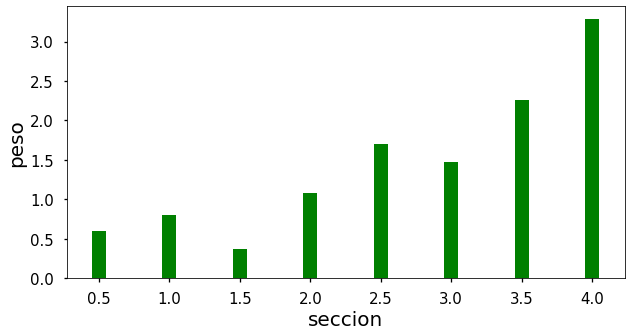

In [24]:
# Escriba su código
# Marcas sobre la varilla de cada sección
secciones = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5,4.0]) 

# Peso de cada sección [kg]
masas_sec = np.array([0.595, 0.806, 0.369, 1.078, 1.704, 
                      1.475, 2.263,  3.282])

plt.bar(secciones[1:],masas_sec,width=0.1,color='g',label='Peso de cada seccion de varilla' )
plt.xlabel('seccion')
plt.ylabel('peso')
plt.show()

## Ejercicio 2.
El peso se puede ir acumulando para obtener el peso original de la varilla. El código siguiente hace esa acumulación y guarda la información en el arreglo `masa` de numpy:

```python
masa = np.zeros(len(secciones))
for i, ms in enumerate(masas_sec):
    masa[i+1] = masa[i] + ms
```

Escriba el código anterior y después grafique el contenido del arreglo `masa` sobre la gráfica de barras anterior.

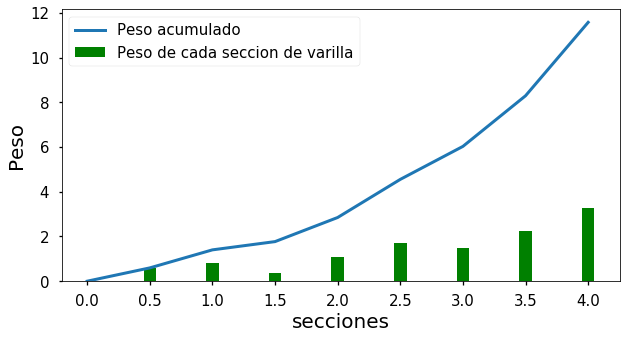

In [25]:
# Escriba su código
masa = np.zeros(len(secciones))
for i, ms in enumerate(masas_sec):
    masa[i+1] = masa[i] + ms


plt.plot(secciones,masa, label='Peso acumulado')
plt.bar(secciones[1:],masas_sec,width=0.1,color='g',label='Peso de cada seccion de varilla' )
plt.xlabel('secciones')
plt.ylabel('Peso')
plt.legend()
plt.show()

## Ejercicio 3.
Si todo se hizo correctamente, se verá que el peso no crece linealmente. Se sospecha que la densidad de la varilla no cambia homogéneamente en toda su longitud. Suponemos que todo está en una dimensión, de tal manera que podemos definir una densidad *lineal* de la siguiente manera:

$$
\rho(x) = \frac{\text{Masa}}{Longitud} = \frac{m}{l}
$$

Recordemos que la masa es una **propiedad extensiva**: es directamente proporcional al tamaño del sistema o a la cantidad de material, mientras que la densidad es una **propiedad intensiva**: no depende del tamaño del sistema, es invariante a la escala.

Si observamos con atención, esta densidad se puede calcular por cada sección, vea la figura:

<img src="./Figuras/secciones_mi.png">


$\rho_i = \dfrac{m_i}{l_i}$ para $i = 0,1,2, \dots$ donde $m_i$ es la masa de la sección y $l_i$ su longitud.

Si observamos con más atención, la densidad de la sección $i$ se puede obtener mediante la siguiente aproximación:

$\rho_i \approx \dfrac{m_{i} - m_{i-1}}{l_{i} - l_{i-1}} = \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} $

La fórmula anterior, cuando $\delta l_{i} \to 0$, representa una derivada:

$\displaystyle
\rho_i = \lim_{\delta l_{i} \to 0} \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} = \dfrac{d}{d x}\Big(m (x)\Big)
$

Escriba una función para calcular la densidad de la barra para cada sección usando la aproximación anterior. Grafique la masa y la densidad en una sola figura.

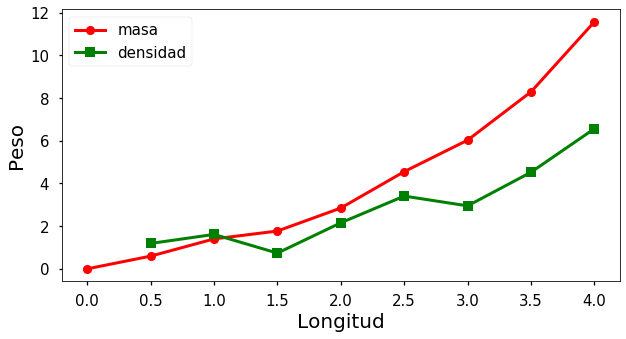

In [26]:
# Escriba su código
def calcdensidad(masa,secciones):
    
    h=len(masa) 
    densidad=[]
    for i in range(1,h):
        #se omite el elemento 0 debido a que en ese punto no existe i-1
        densidad.append((masa[i]-masa[i-1])/(secciones[i]-secciones[i-1]))

    return densidad                    

densidad=calcdensidad(masa,secciones)
plt.plot(secciones,masa,'ro-',label='masa')
plt.plot(secciones[1:],densidad,'sg-',label='densidad')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend()
plt.show()

## Ejercicio 3.
Después de una búsqueda sobre las especificaciones de la varilla, se encuentra que la densidad está dada por siguiente fórmula:

$\rho = (1000 x^2 + 5000 \sin(2x)^2 ) \times A$

donde $x$ es la posición en la varilla y $A$ es el área transversal. Al medir el diámetro de la varilla se encuentra el valor de $d = 0.02$ m , por lo tanto el radio es $r = 0.01$ m.

Grafique está fórmula y cómparela con los cálculos aproximados que hicimos antes:

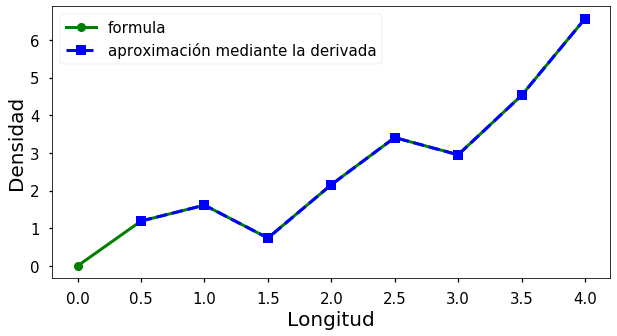

In [27]:
# Escriba su código
densidad2= lambda x, A: (1000*x**2+5000*np.sin(2*x)**2)*A
r=0.01
A=np.pi*r**2

rho=densidad2(secciones,A)

plt.plot(secciones,rho, 'go-',label='formula')
plt.plot(secciones[1:],densidad, 'bs--',label='aproximación mediante la derivada')
plt.xlabel('Longitud')
plt.ylabel('Densidad')
plt.legend()
plt.show()

## Ejercicio 4.
Para evaluar la aproximación, cálcule el error absoluto y el error relativo para cada punto.


In [28]:
Ea = lambda e, a: np.fabs(e - a)
Er = lambda e, a: np.fabs(e - a) / np.fabs(e)

# Escriba su código
Eabs=Ea(rho[1:],densidad)
Erel=Er(rho[1:],densidad)
pd.DataFrame(np.array([rho[1:],densidad,Eabs,Erel]).transpose(),columns=['$\rho$','densidad','$E_{abs}$','$E_{rel}$'])

,$\rho$,densidad,$E_{abs}$,$E_{rel}$
0,1.190779,1.190,0.000779,0.000654
1,1.612928,1.612,0.000928,0.000575
2,0.738141,0.738,0.000141,0.000190
3,2.156311,2.156,0.000311,0.000144
4,3.407899,3.408,0.000101,0.000030
5,2.950070,2.950,0.000070,0.000024
6,4.526456,4.526,0.000456,0.000101
7,6.564090,6.564,0.000090,0.000014


## Ejercicio 5.
Calcule la integral de la densidad

$\rho = (1000 x^2 + 5000 \sin(2x)^2 ) \times A$

para encontrar la fórmula de la masa $m(x)$.

Después realice todas las graficas de tal manera que obtenga una figura como la siguiente:

<img src="./Figuras/tresgraficas.png">

**Hint**: Para calcular la integral puede usar sympy, por ejemplo:
```python
from sympy import Symbol, integrate, sin
x = Symbol('x')
integrate(sin(2x)**2, x)
```
Utilice la función `subplots()` de matplotlib para crear varias gráficas en una sola figura, por ejemplo:

```python
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(x, m, 'C0--', label = 'Gráfica 1')
axs[1].plot(x, d, 'C1-', label= 'Gráfica 2')
plt.show()
```

In [29]:
# Escriba su código
from sympy import Symbol, integrate, sin
x = Symbol('x')
#A= Symbol('A')
integrate((1000*x**2+5000*sin(2*x)**2), x)


1000*x**3/3 + 2500*x - 1250*sin(2*x)*cos(2*x)

In [30]:

masa_integral = lambda x,A: ((1000*x**3)/3+2500*x-1250*np.sin(2*x)*np.cos(2*x))*A
masita=masa_integral(secciones,A)


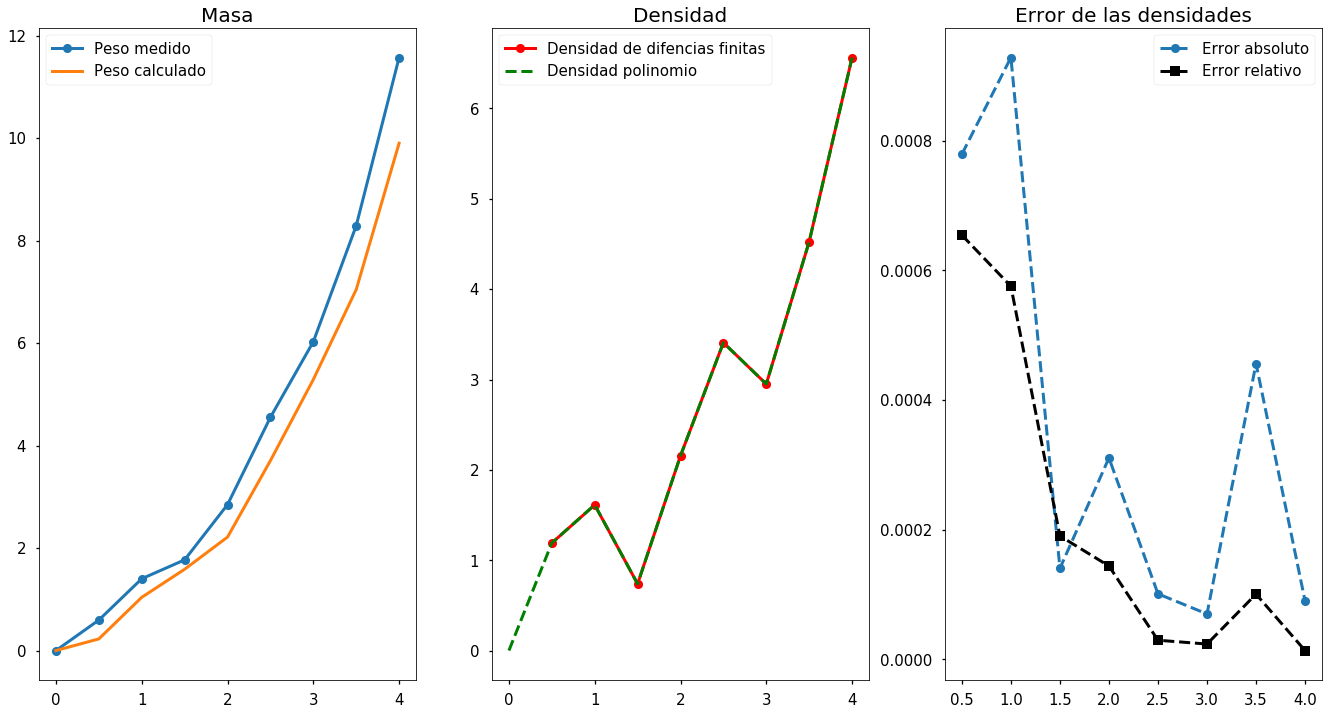

In [31]:
fig, axs = plt.subplots(1,3,figsize=(23,12))
axs[0].plot(secciones, masa, 'o-', label = 'Peso medido')
axs[0].plot(secciones,masita, label= 'Peso calculado')
axs[1].plot(secciones[1:],densidad, 'ro-', label= 'Densidad de difencias finitas')
axs[1].plot(secciones,rho, 'g--', label='Densidad polinomio')
axs[2].plot(secciones[1:],Eabs, 'o--', label='Error absoluto')
axs[2].plot(secciones[1:],Erel, 'sk--', label='Error relativo')

#Titulos
axs[0].set_title('Masa')
axs[1].set_title('Densidad')
axs[2].set_title('Error de las densidades')
for ax in axs:
    ax.legend()
plt.show()